In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Loading the data
df = pd.read_excel('../data-set/Adidas US Sales Datasets.xlsx', sheet_name='Data Sales Adidas', skiprows=range(4))
df.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
df.shape

(9648, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [6]:
df.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [7]:
# Cheking duplicated data
df.duplicated().sum()

0

In [8]:
# Checking missing values
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

## EDA

In [9]:
working_df = df.drop('Retailer ID', axis=1)
working_df

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.00,0.50,In-store
1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.00,0.30,In-store
2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.00,0.35,In-store
3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.00,0.35,In-store
4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50.0,64,3200.0,896.00,0.28,Outlet
9644,Foot Locker,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41.0,105,4305.0,1377.60,0.32,Outlet
9645,Foot Locker,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41.0,184,7544.0,2791.28,0.37,Outlet
9646,Foot Locker,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42.0,70,2940.0,1234.80,0.42,Outlet


In [10]:
df_total_sales_per_product = working_df[['Product', 'Units Sold', 'Total Sales']].groupby(['Product']).sum()
df_total_sales_per_product.reset_index(inplace=True)
df_total_sales_per_product.sort_values(by='Total Sales', ascending=False)

,Product,Units Sold,Total Sales
2,Men's Street Footwear,593320,208826244.0
3,Women's Apparel,433827,179038860.0
1,Men's Athletic Footwear,435526,153673680.0
5,Women's Street Footwear,392269,128002813.0
0,Men's Apparel,306683,123728632.0
4,Women's Athletic Footwear,317236,106631896.0


<AxesSubplot: xlabel='Total Sales', ylabel='Product'>

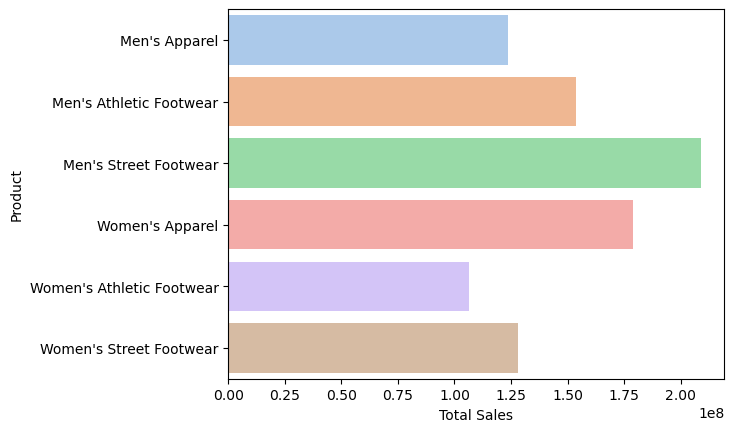

In [11]:
sns.barplot(x='Total Sales', y='Product', data=df_total_sales_per_product, estimator=np.sum, errorbar=None, palette='pastel')

In [12]:
df_total_sales_per_retailer = working_df[['Retailer', 'Units Sold', 'Total Sales']].groupby('Retailer').sum()
df_total_sales_per_retailer.reset_index(inplace=True)
df_total_sales_per_retailer.sort_values(by='Total Sales', ascending=False)

,Retailer,Units Sold,Total Sales
5,West Gear,625262,242964333.0
1,Foot Locker,604369,220094720.0
3,Sports Direct,557640,182470997.0
2,Kohl's,287375,102114753.0
0,Amazon,197990,77698912.0
4,Walmart,206225,74558410.0


<AxesSubplot: xlabel='Total Sales', ylabel='Retailer'>

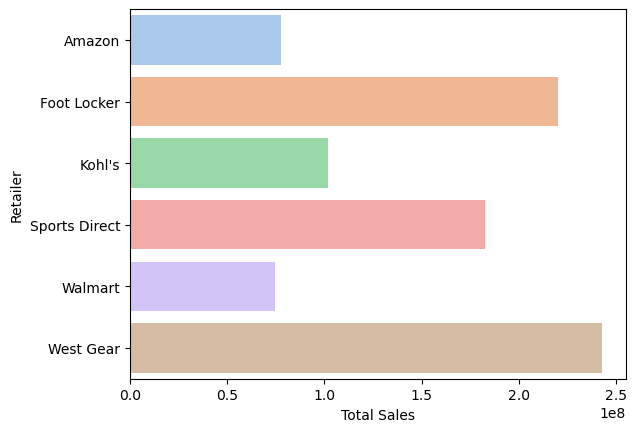

In [13]:
sns.barplot(x='Total Sales', y='Retailer', data=df_total_sales_per_retailer, estimator=np.sum, errorbar=None, palette='pastel')

In [14]:
df_sales_method = working_df[['Sales Method', 'Units Sold', 'Total Sales']].groupby('Sales Method').sum()
df_sales_method.reset_index(inplace=True)
df_sales_method.sort_values(by='Total Sales', ascending=False)

,Sales Method,Units Sold,Total Sales
0,In-store,689990,356643750.0
2,Outlet,849778,295585493.0
1,Online,939093,247672882.0


<AxesSubplot: xlabel='Sales Method', ylabel='Total Sales'>

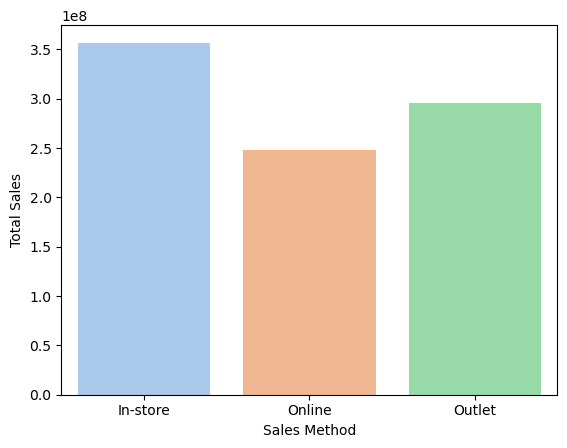

In [15]:
sns.barplot(x='Sales Method', y='Total Sales', data=df_sales_method, estimator=np.sum, errorbar=None, palette='pastel')

In [16]:
df_price = working_df[['Sales Method', 'Price per Unit']].groupby('Sales Method').mean()
df_price.rename(columns={'Price per Unit': 'Average Price per Unit'}, inplace=True)
df_price.reset_index(inplace=True)
df_price.sort_values(by='Average Price per Unit', ascending=False)

,Sales Method,Average Price per Unit
0,In-store,48.816092
1,Online,45.903252
2,Outlet,42.030142


<AxesSubplot: xlabel='Sales Method', ylabel='Average Price per Unit'>

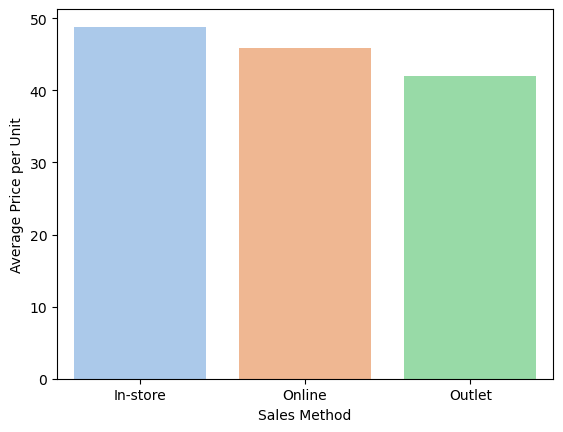

In [17]:
sns.barplot(x='Sales Method', y='Average Price per Unit', data=df_price, errorbar=None, palette='pastel')

In [18]:
df_region = working_df[['Region', 'Units Sold', 'Total Sales']].groupby('Region').sum()
df_region.reset_index(inplace=True)
df_region.sort_values(by='Total Sales', ascending=False)

,Region,Units Sold,Total Sales
4,West,686985,269943182.0
1,Northeast,501279,186324067.0
3,Southeast,407000,163171236.0
2,South,492260,144663181.0
0,Midwest,391337,135800459.0


<AxesSubplot: xlabel='Region', ylabel='Total Sales'>

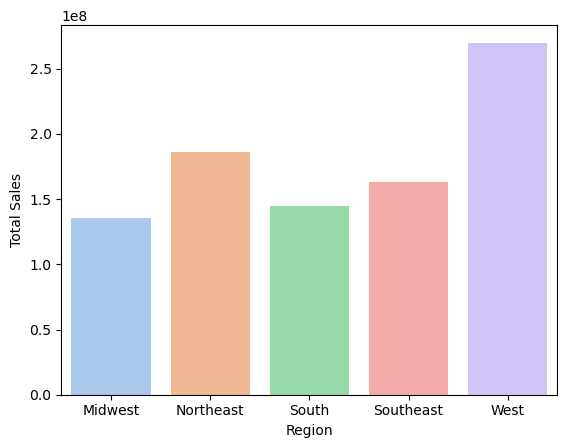

In [19]:
sns.barplot(x='Region', y='Total Sales', data=df_region, estimator=np.sum, errorbar=None, palette='pastel')

In [20]:
df_west_region = working_df[working_df['Region'] == 'West']
df_west_region

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
144,West Gear,2020-11-05,West,California,San Francisco,Men's Apparel,55.0,575,316250.0,158125.00,0.50,Outlet
145,West Gear,2020-11-06,West,California,San Francisco,Women's Apparel,50.0,775,387500.0,58125.00,0.15,Outlet
146,West Gear,2020-11-07,West,California,San Francisco,Men's Street Footwear,40.0,825,330000.0,115500.00,0.35,Outlet
147,West Gear,2020-11-08,West,California,San Francisco,Men's Athletic Footwear,50.0,725,362500.0,72500.00,0.20,Outlet
148,West Gear,2020-11-09,West,California,San Francisco,Women's Street Footwear,50.0,725,362500.0,126875.00,0.35,Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
8995,Sports Direct,2021-01-13,West,New Mexico,Albuquerque,Men's Apparel,35.0,75,2625.0,1050.00,0.40,Outlet
8996,Sports Direct,2021-01-13,West,New Mexico,Albuquerque,Women's Apparel,28.0,140,3920.0,1254.40,0.32,Outlet
8997,Sports Direct,2021-02-13,West,New Mexico,Albuquerque,Men's Street Footwear,23.0,150,3450.0,1483.50,0.43,Outlet
8998,Sports Direct,2021-02-13,West,New Mexico,Albuquerque,Men's Athletic Footwear,27.0,124,3348.0,1540.08,0.46,Outlet


In [21]:
df_west_region_state = df_west_region[['State', 'Units Sold', 'Total Sales']].groupby('State').sum()
df_west_region_state.reset_index(inplace=True)
df_west_region_state.sort_values(by='Total Sales', ascending=False)

,State,Units Sold,Total Sales
2,California,163284,60174133.0
10,Washington,46611,26330718.0
4,Hawaii,40375,22282457.0
8,Oregon,50536,21349674.0
3,Colorado,41378,20996536.0
6,Nevada,51831,20858509.0
7,New Mexico,52633,19865016.0
5,Idaho,63827,19276878.0
11,Wyoming,50228,18577517.0
1,Arizona,46919,15782221.0


<AxesSubplot: xlabel='Total Sales', ylabel='State'>

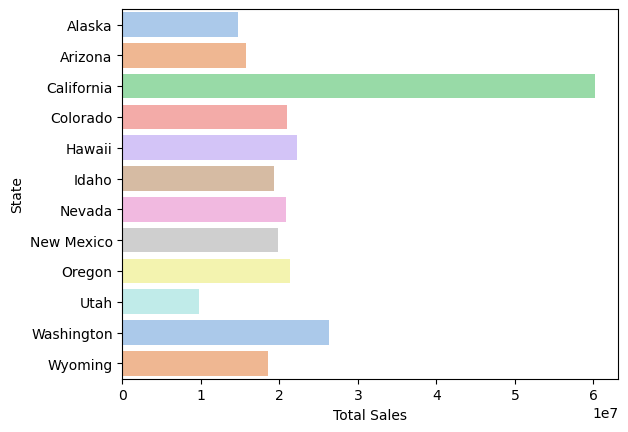

In [22]:
sns.barplot(x='Total Sales', y='State', data=df_west_region_state, estimator=np.sum, errorbar=None, palette='pastel')

In [23]:
df_west_region_city = df_west_region[['City', 'Units Sold', 'Total Sales']].groupby('City').sum()
df_west_region_city.reset_index(inplace=True)
df_west_region_city.sort_values(by='Total Sales', ascending=False)

,City,Units Sold,Total Sales
11,San Francisco,86900,34539220.0
12,Seattle,46611,26330718.0
7,Los Angeles,76384,25634913.0
5,Honolulu,40375,22282457.0
9,Portland,50536,21349674.0
4,Denver,41378,20996536.0
6,Las Vegas,51831,20858509.0
0,Albuquerque,52633,19865016.0
2,Boise,63827,19276878.0
3,Cheyenne,50228,18577517.0


<AxesSubplot: xlabel='Total Sales', ylabel='City'>

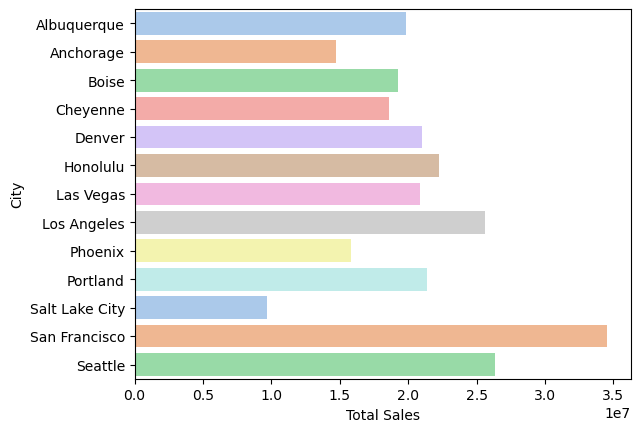

In [24]:
sns.barplot(x='Total Sales', y='City', data=df_west_region_city, estimator=np.sum, errorbar=None, palette='pastel')

In [25]:
df_to_excel = pd.ExcelWriter('adidas-sales.xlsx')
df.to_excel(df_to_excel, sheet_name='Original')
working_df.to_excel(df_to_excel, sheet_name='Working Sheet')
df_total_sales_per_product.to_excel(df_to_excel, sheet_name='Total Sales per Product')
df_total_sales_per_retailer.to_excel(df_to_excel, sheet_name='Total Sales per Retailer')
df_sales_method.to_excel(df_to_excel, sheet_name='Sales Method')
df_price.to_excel(df_to_excel, sheet_name='Sales Method', startrow=7)
df_region.to_excel(df_to_excel, sheet_name='Region')
df_west_region_state.to_excel(df_to_excel, sheet_name='Region', startrow=10)
df_west_region_city.to_excel(df_to_excel, sheet_name='Region', startrow=27)

df_to_excel.save()

C:\Users\qaris\AppData\Local\Temp\ipykernel_12048\2654176979.py:12: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  df_to_excel.save()


## Conclusion

1. Product with the highest total sales is **Men's Street Footwear**
2. Retailer with the highest total sales is **West Gears**
3. Sales method with the highest total sales is **In-store**, despite the least units sold. Probably because the average price per units are higher than the other two sales method
4. The west region generates the highest total sales